CNN to do Handwritted Digits classification using MNIST dataset. Compare it with ANN

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers,models,datasets

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [5]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [17]:
def plot(x,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(x[index])
    plt.title(y[index])

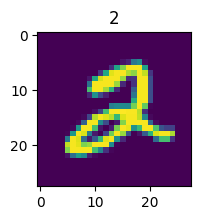

In [18]:
plot(x_train,y_train,5)

In [20]:
x_train = x_train/255;   x_test = x_test/255;

# ANN MODEL

In [46]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1220 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0835 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0628 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0494 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0402 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0321 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0270 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.018

In [47]:
y_pred = ann.predict(x_test)
y_predicted = [np.argmax(element) for element in y_pred]
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [49]:
#Normalization

(60000, 28, 28, 1)

In [50]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape,x_test.shape

(10000, 28, 28, 1)

In [51]:
cnn = models.Sequential([
    #CNN layer 1
    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    #dense NN
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1615 - accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0550 - accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0155 - accuracy: 0.9952


In [52]:
y_pred_cnn = cnn.predict(x_test)
y_predicted_cnn = [np.argmax(element) for element in y_pred_cnn]
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_cnn))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

